In [1]:
# import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# Read data files
data_cust_acqui = pd.read_csv('Customer Acqusition.csv', engine='pyarrow').convert_dtypes()
data_repay = pd.read_csv('Repayment.csv',engine='pyarrow').convert_dtypes()
data_spend = pd.read_csv('spend.csv', engine='pyarrow').convert_dtypes()

In [3]:
data_cust_acqui = data_cust_acqui.drop(['No'],axis=1)
data_cust_acqui.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001,C4,Govt
4,A5,56,BANGALORE,Platimum,10002,C5,Normal Salary


In [4]:
data_cust_acqui['Product']=data_cust_acqui['Product'].replace('Platimum','Platinum')

In [5]:
data_cust_acqui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  100 non-null    string
 1   Age       100 non-null    Int64 
 2   City      100 non-null    string
 3   Product   100 non-null    string
 4   Limit     100 non-null    Int64 
 5   Company   100 non-null    string
 6   Segment   100 non-null    string
dtypes: Int64(2), string(5)
memory usage: 5.8 KB


In [6]:
data_repay = data_repay.drop(['SL No:',''], axis=1)
data_repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [7]:
data_repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1523 non-null   string 
 1   Month     1523 non-null   string 
 2   Amount    1500 non-null   Float64
dtypes: Float64(1), string(2)
memory usage: 37.3 KB


In [8]:
data_repay['Month'] = pd.to_datetime(data_repay['Month'], format='%d-%b-%y')

In [9]:
data_repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1523 non-null   string        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   Float64       
dtypes: Float64(1), datetime64[ns](1), string(1)
memory usage: 37.3 KB


In [10]:
data_spend=data_spend.drop(['Sl No:'], axis=1)
data_spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.8
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [11]:
data_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   string 
 1   Month     1500 non-null   string 
 2   Type      1500 non-null   string 
 3   Amount    1500 non-null   Float64
dtypes: Float64(1), string(3)
memory usage: 48.5 KB


In [12]:
data_spend['Month'] = pd.to_datetime(data_spend['Month'], format='%d-%b-%y')

In [13]:
data_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   string        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   string        
 3   Amount    1500 non-null   Float64       
dtypes: Float64(1), datetime64[ns](1), string(2)
memory usage: 48.5 KB


In [14]:
data_cust_acqui[data_cust_acqui['Age']< 18]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,16,BANGALORE,Gold,500000,C14,Salaried_Pvt
40,A41,13,COCHIN,Platinum,500000,C23,Govt
62,A63,15,BANGALORE,Gold,500000,C25,Self Employed
67,A68,12,TRIVANDRUM,Silver,100000,C30,Self Employed
69,A70,16,BOMBAY,Platinum,10001,C32,Self Employed
89,A90,16,COCHIN,Gold,500000,C13,Govt


In [15]:
# Q. 1(a) : In case age is less than 18, replace it with mean of age values.
data_cust_acqui['Age'] = np.where((data_cust_acqui['Age'] < 18),(np.round(data_cust_acqui['Age'].mean(),decimals=0)).astype('int64'), data_cust_acqui['Age'])

In [16]:
data_cust_acqui['Age'] = pd.to_numeric(data_cust_acqui['Age'])

In [17]:
data_cust_acqui.dtypes

Customer    string[python]
Age                  int64
City        string[python]
Product     string[python]
Limit                Int64
Company     string[python]
Segment     string[python]
dtype: object

In [18]:
data_spend_CustAcqui = pd.merge(data_spend, data_cust_acqui, how='left', on='Customer')
data_repay_CustAcqui = pd.merge(data_repay, data_cust_acqui, how='left', on='Customer')

In [19]:
data_spend_CustAcqui.head()

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed
1,A1,2004-01-03,PETRO,410556.13,76,BANGALORE,Gold,500000,C1,Self Employed
2,A1,2004-01-15,CLOTHES,23740.46,76,BANGALORE,Gold,500000,C1,Self Employed
3,A1,2004-01-25,FOOD,484342.47,76,BANGALORE,Gold,500000,C1,Self Employed
4,A1,2005-01-17,CAMERA,369694.07,76,BANGALORE,Gold,500000,C1,Self Employed


In [20]:
data_spend_CustAcqui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   string        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   string        
 3   Amount    1500 non-null   Float64       
 4   Age       1500 non-null   int64         
 5   City      1500 non-null   string        
 6   Product   1500 non-null   string        
 7   Limit     1500 non-null   Int64         
 8   Company   1500 non-null   string        
 9   Segment   1500 non-null   string        
dtypes: Float64(1), Int64(1), datetime64[ns](1), int64(1), string(6)
memory usage: 120.2 KB


In [21]:
data_repay_CustAcqui['Age'] = pd.to_numeric(data_repay_CustAcqui['Age'])

In [22]:
data_repay_CustAcqui.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000,C1,Self Employed
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000,C1,Self Employed
2,A1,2004-01-15,259490.06,76.0,BANGALORE,Gold,500000,C1,Self Employed
3,A1,2004-01-25,437555.12,76.0,BANGALORE,Gold,500000,C1,Self Employed
4,A1,2005-01-17,165972.88,76.0,BANGALORE,Gold,500000,C1,Self Employed


In [23]:
data_repay_CustAcqui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1523 non-null   string        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   Float64       
 3   Age       1500 non-null   float64       
 4   City      1500 non-null   string        
 5   Product   1500 non-null   string        
 6   Limit     1500 non-null   Int64         
 7   Company   1500 non-null   string        
 8   Segment   1500 non-null   string        
dtypes: Float64(1), Int64(1), datetime64[ns](1), float64(1), string(5)
memory usage: 110.2 KB


In [24]:
data_spend_CustAcqui.head()

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed
1,A1,2004-01-03,PETRO,410556.13,76,BANGALORE,Gold,500000,C1,Self Employed
2,A1,2004-01-15,CLOTHES,23740.46,76,BANGALORE,Gold,500000,C1,Self Employed
3,A1,2004-01-25,FOOD,484342.47,76,BANGALORE,Gold,500000,C1,Self Employed
4,A1,2005-01-17,CAMERA,369694.07,76,BANGALORE,Gold,500000,C1,Self Employed


In [25]:
# Q.1(b). In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)
data_spend_CustAcqui['Amount'] = np.where((data_spend_CustAcqui['Amount'] > data_spend_CustAcqui['Limit']),data_spend_CustAcqui['Limit']*0.5,data_spend_CustAcqui['Amount'])

In [26]:
# deleting NULL rows from data_repay_CustAcqui
data_repay_CustAcqui = data_repay_CustAcqui.dropna(axis=0, thresh=2)

In [27]:
# Q.1(c). Incase the repayment amount is more than the limit, replace the repayment with the limit
data_repay_CustAcqui['Amount'] = np.where((data_repay_CustAcqui['Amount'] > data_repay_CustAcqui['Limit']),data_repay_CustAcqui['Limit'],data_repay_CustAcqui['Amount'])

In [28]:
# Q.2(a) From the above dataset create the following summaries: How many distinct customers exist?
print(f"Total no. of unique customers are {data_cust_acqui['Customer'].nunique()}")

Total no. of unique customers are 100


In [29]:
# Q.2(b) From the above dataset create the following summaries: How many distinct categories exist?
print(f"The no. of Distinct categories are {data_cust_acqui['Product'].nunique()}")

The no. of Distinct categories are 3


In [30]:
data_spend_CustAcqui.head()

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed
1,A1,2004-01-03,PETRO,410556.13,76,BANGALORE,Gold,500000,C1,Self Employed
2,A1,2004-01-15,CLOTHES,23740.46,76,BANGALORE,Gold,500000,C1,Self Employed
3,A1,2004-01-25,FOOD,484342.47,76,BANGALORE,Gold,500000,C1,Self Employed
4,A1,2005-01-17,CAMERA,369694.07,76,BANGALORE,Gold,500000,C1,Self Employed


In [31]:
# creating a column for month named spend_Month
data_spend_CustAcqui['spend_Month'] = data_spend_CustAcqui['Month'].dt.month

In [32]:
data_spend_CustAcqui.head()

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment,spend_Month
0,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed,1
1,A1,2004-01-03,PETRO,410556.13,76,BANGALORE,Gold,500000,C1,Self Employed,1
2,A1,2004-01-15,CLOTHES,23740.46,76,BANGALORE,Gold,500000,C1,Self Employed,1
3,A1,2004-01-25,FOOD,484342.47,76,BANGALORE,Gold,500000,C1,Self Employed,1
4,A1,2005-01-17,CAMERA,369694.07,76,BANGALORE,Gold,500000,C1,Self Employed,1


In [33]:
# Q.2(c) From the above dataset create the following summaries : What is the average monthly spend by customers?
data_spend_CustAcqui.groupby(['Customer','spend_Month']).agg({'Amount':'mean'})

Amount
Customer spend_Month               
A1       1            372762.587143
         2                175235.69
         4                261649.25
         5                361141.31
         8                 344372.1
...                             ...
A95      1                 240401.5
A96      1                 54729.66
A97      1                   5000.0
A98      1                   5000.5
A99      1                   5001.0

[578 rows x 1 columns]

In [34]:
# creating a column for month named repay_Month
data_repay_CustAcqui['repay_Month'] = data_repay_CustAcqui['Month'].dt.month
data_repay_CustAcqui.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment,repay_Month
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000,C1,Self Employed,1
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000,C1,Self Employed,1
2,A1,2004-01-15,259490.06,76.0,BANGALORE,Gold,500000,C1,Self Employed,1
3,A1,2004-01-25,437555.12,76.0,BANGALORE,Gold,500000,C1,Self Employed,1
4,A1,2005-01-17,165972.88,76.0,BANGALORE,Gold,500000,C1,Self Employed,1


In [35]:
# Q.2(d) From the above dataset create the following summaries : What is the average monthly repayment by customers?
data_repay_CustAcqui.groupby(['Customer','repay_Month']).agg({'Amount':'mean'})

Amount
Customer repay_Month               
A1       1            343972.327143
         2                156374.76
         4                254474.58
         7                297176.74
         9                 186427.5
...                             ...
A95      1                369405.96
A96      1                 100000.0
A97      1                  10000.0
A98      1                  10001.0
A99      1                  10002.0

[558 rows x 1 columns]

In [36]:
# Q.2(e) From the above dataset create the following summaries:  If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

interest_rate = 2.9
monthly_profit = ((data_repay_CustAcqui.groupby(['repay_Month']).agg({'Amount':'mean'}).Amount).subtract((data_spend_CustAcqui.groupby(['spend_Month']).agg({'Amount':'mean'}).Amount), axis=0))

In [37]:
monthly_profit.where(monthly_profit>0)*interest_rate/100

repay_Month
1      454.585179
2      220.734458
3      713.112677
4       946.58574
5      999.743732
6             NaN
7             NaN
8             NaN
9             NaN
10    1133.931159
11      65.649389
12    2113.123125
Name: Amount, dtype: object

In [38]:
# Q.2(f) From the above dataset create the following summaries: What are the top 5 product types?
data_spend_CustAcqui['Type'].value_counts().head(5)

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: Int64

In [39]:
# Q.2(g) From the above dataset create the following summaries: Which city is having maximum spend?
df_city_spend = data_spend_CustAcqui.groupby(['City']).agg({'Amount':'sum'})
df_city_spend['Amount'] = pd.to_numeric(df_city_spend['Amount'])
print(f"City having the maximum spend: {df_city_spend.idxmax()[0]}")

City having the maximum spend: COCHIN


In [40]:
# Q.2(h) From the above dataset create the following summaries: Which age group is spending more money?
df_age_spend = data_spend_CustAcqui.groupby(['Age']).agg({'Amount':'sum'})
df_age_spend['Amount'] = pd.to_numeric(df_age_spend['Amount'])
print((f"the age which spends the maximum money is: {df_age_spend.idxmax()[0]}"))

the age which spends the maximum money is: 46


In [41]:
# Q.2(i) From the above dataset create the following summaries: Who are the top 10 customers in terms of repayment?
print(f"top 10 customers in terms of repayment are {list(data_repay_CustAcqui.groupby(['Customer']).agg({'Amount':'sum'}).sort_values(by='Amount', ascending=False).head(10).index)}")

top 10 customers in terms of repayment are ['A61', 'A60', 'A13', 'A43', 'A45', 'A12', 'A14', 'A44', 'A39', 'A42']


In [42]:
# created a column for year called spend_year
data_spend_CustAcqui['spend_year']=data_spend_CustAcqui['Month'].dt.year

In [43]:
# Q.3 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
data_spend_CustAcqui.groupby(['spend_year','City','Product']).agg({'Amount':'sum'})

Amount
spend_year City       Product             
2004       BANGALORE  Gold      9289878.54
                      Platinum   1112732.3
                      Silver    1291852.58
           BOMBAY     Gold      6987853.53
                      Platinum   897264.94
...                                    ...
2006       PATNA      Platinum  1256137.65
                      Silver      700005.0
           TRIVANDRUM Gold      2735710.87
                      Platinum  2147403.75
                      Silver     555862.12

[72 rows x 1 columns]

In [44]:
#list(df_yearly_city_product_sales.index.get_level_values(0).unique())
#list(df_yearly_city_product_sales.index.get_level_values(1).unique())
#list(df_yearly_city_product_sales.index.get_level_values(2).unique())
#data_spend_CustAcqui.groupby(['spend_year','City','Product']).agg({'Amount':'sum'}).reset_index()

In [45]:
df_yearly_city_product_sales = data_spend_CustAcqui.groupby(['spend_year','City','Product']).agg({'Amount':'sum'})

In [46]:
df_yearly_city_product_sales

Amount
spend_year City       Product             
2004       BANGALORE  Gold      9289878.54
                      Platinum   1112732.3
                      Silver    1291852.58
           BOMBAY     Gold      6987853.53
                      Platinum   897264.94
...                                    ...
2006       PATNA      Platinum  1256137.65
                      Silver      700005.0
           TRIVANDRUM Gold      2735710.87
                      Platinum  2147403.75
                      Silver     555862.12

[72 rows x 1 columns]

for city BANGALORE, Product & Year wise graphs are:


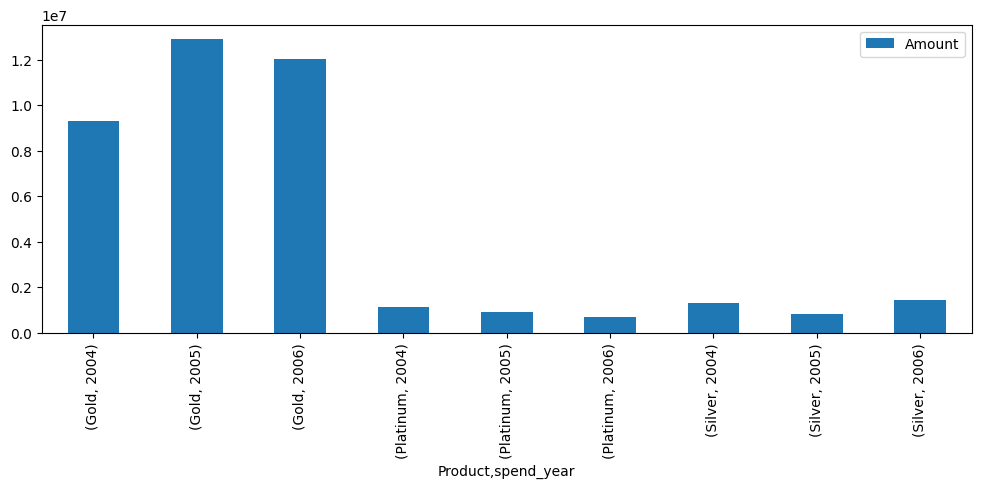

for city BOMBAY, Product & Year wise graphs are:


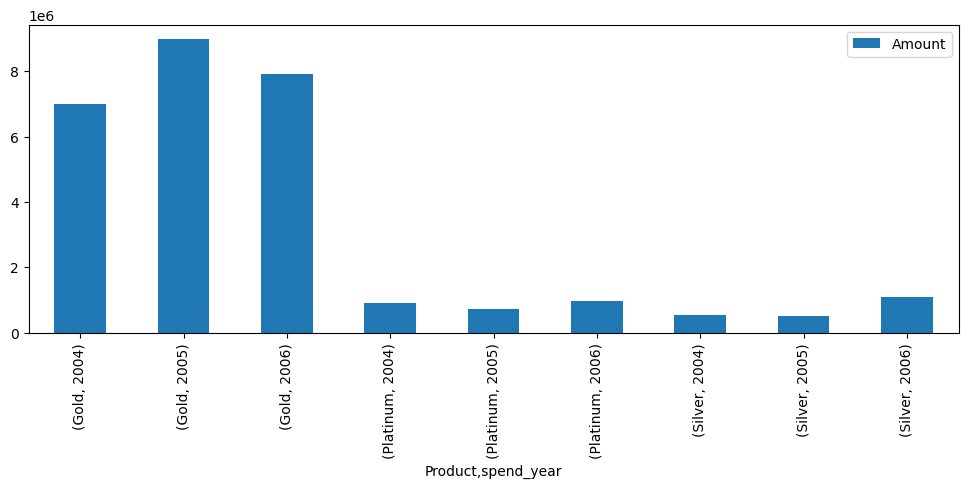

for city CALCUTTA, Product & Year wise graphs are:


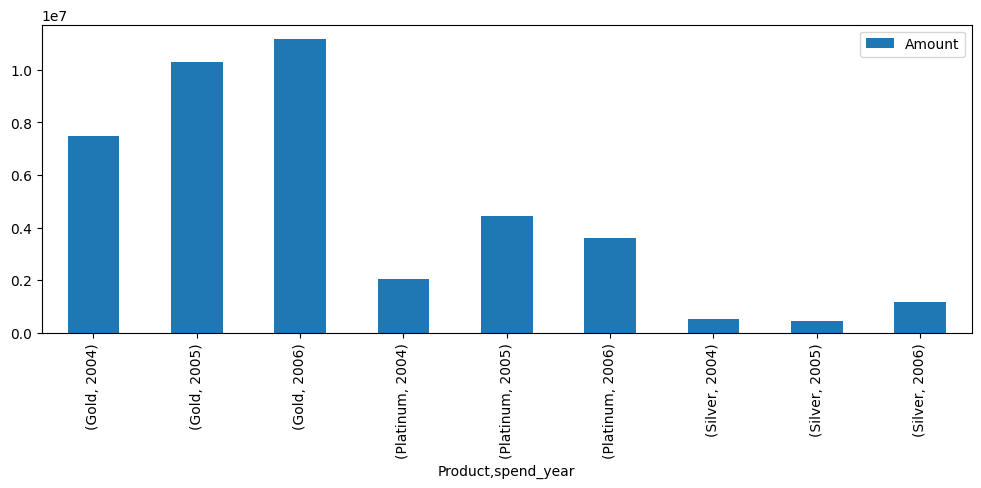

for city CHENNAI, Product & Year wise graphs are:


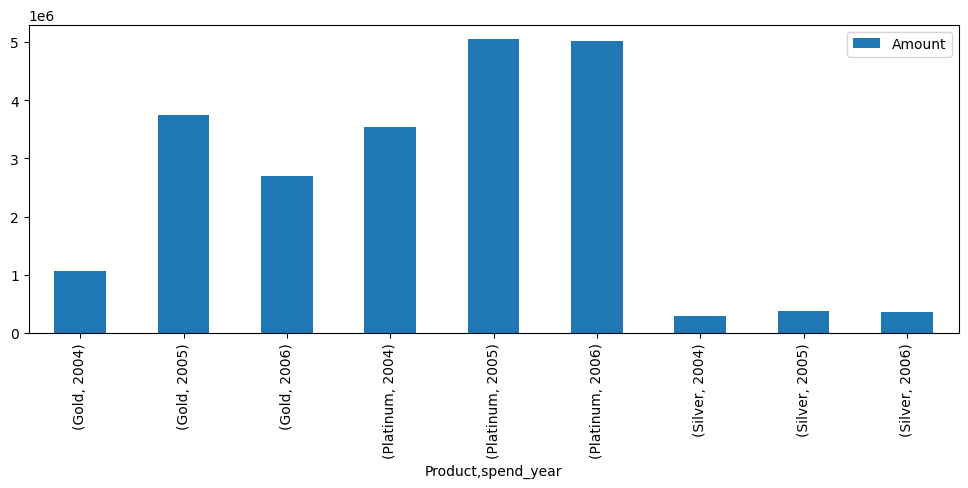

for city COCHIN, Product & Year wise graphs are:


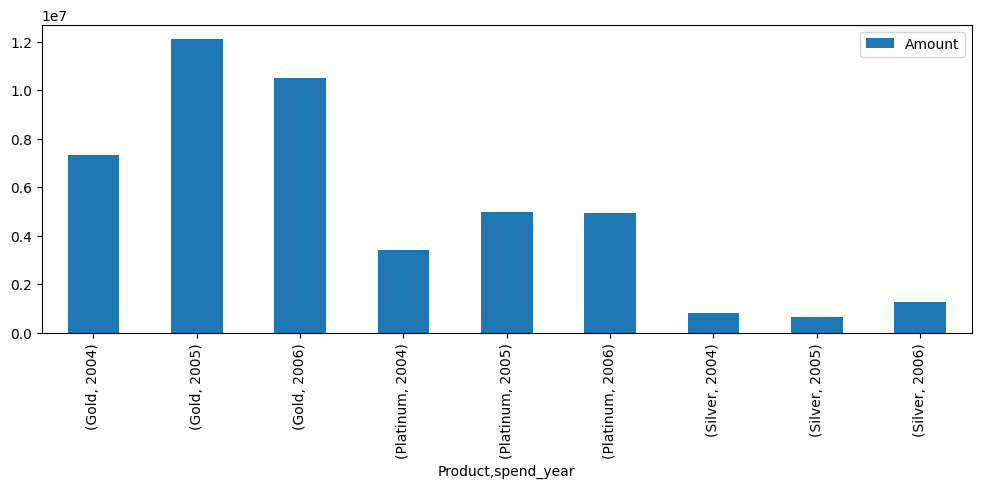

for city DELHI, Product & Year wise graphs are:


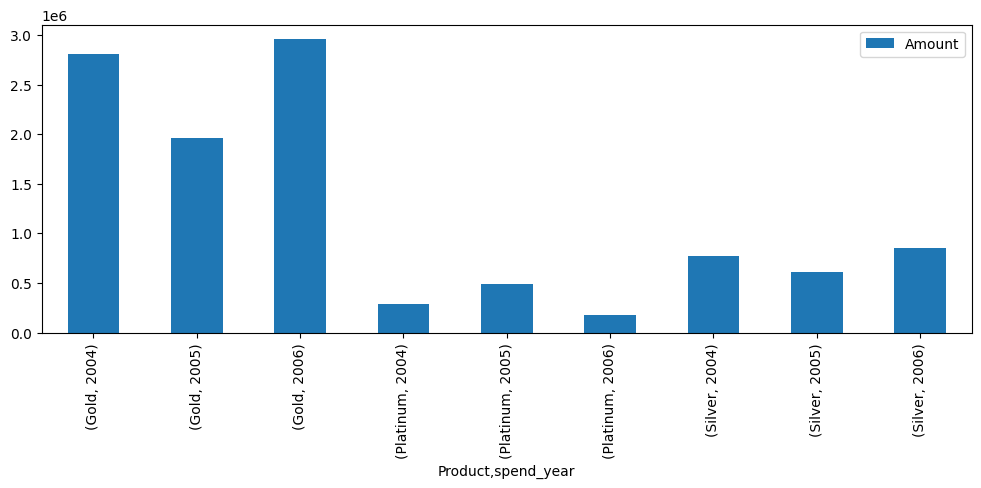

for city PATNA, Product & Year wise graphs are:


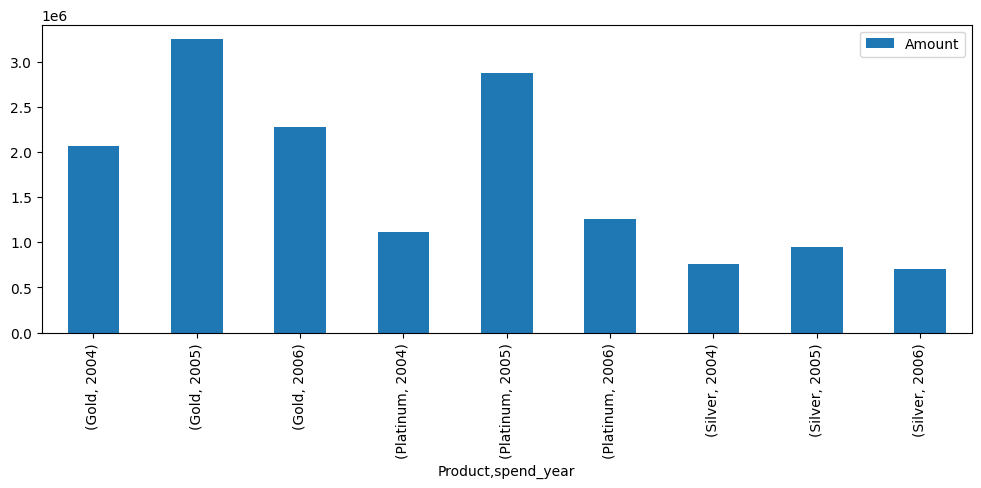

for city TRIVANDRUM, Product & Year wise graphs are:


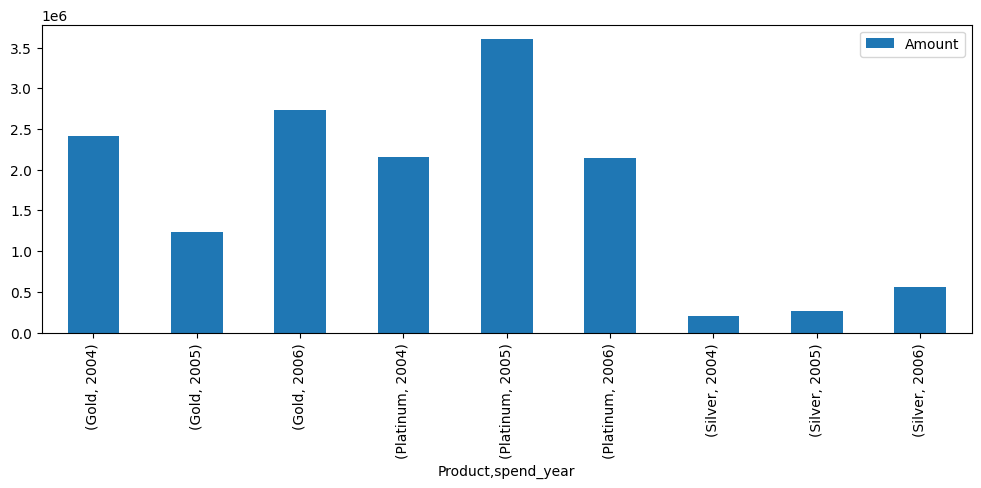

In [47]:
for city in list(df_yearly_city_product_sales.index.get_level_values(1).unique()):
    print(f"for city {city}, Product & Year wise graphs are:")
    for j in list(df_yearly_city_product_sales.index.get_level_values(0).unique()):
        plt.rcParams['figure.figsize'] = [12, 4]
        data_spend_CustAcqui[data_spend_CustAcqui['City']==city].groupby(['Product','spend_year']).agg({'Amount':'sum'}).plot(kind='bar')
        plt.show()
        break

In [48]:
df_city_spend

,Amount
City,
BANGALORE,40461647.02
BOMBAY,28603127.38
CALCUTTA,41108132.30
CHENNAI,22128635.65
COCHIN,45963513.50
DELHI,10918286.54
PATNA,15260586.97
TRIVANDRUM,15337155.87


for city BANGALORE, Monthly spends are:


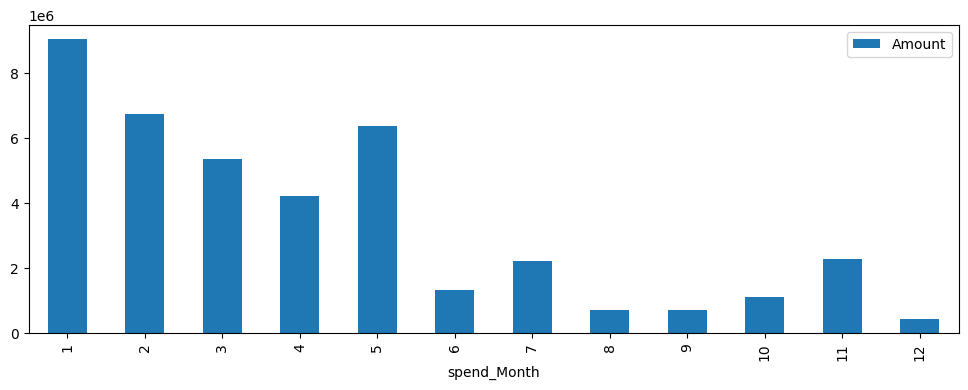

for city BOMBAY, Monthly spends are:


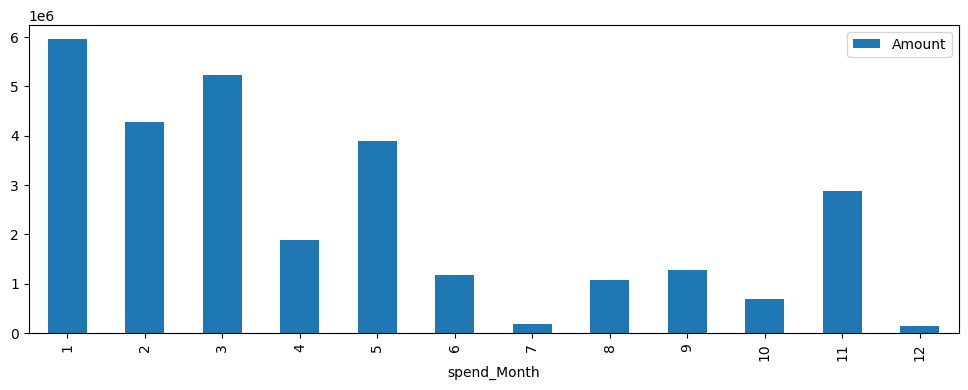

for city CALCUTTA, Monthly spends are:


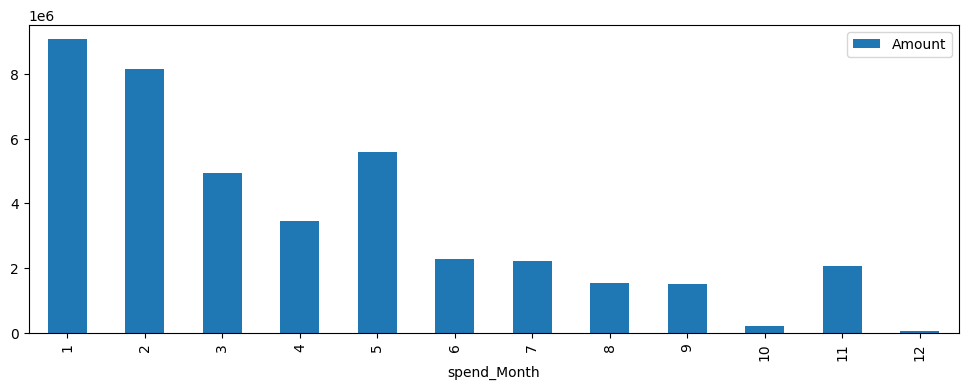

for city CHENNAI, Monthly spends are:


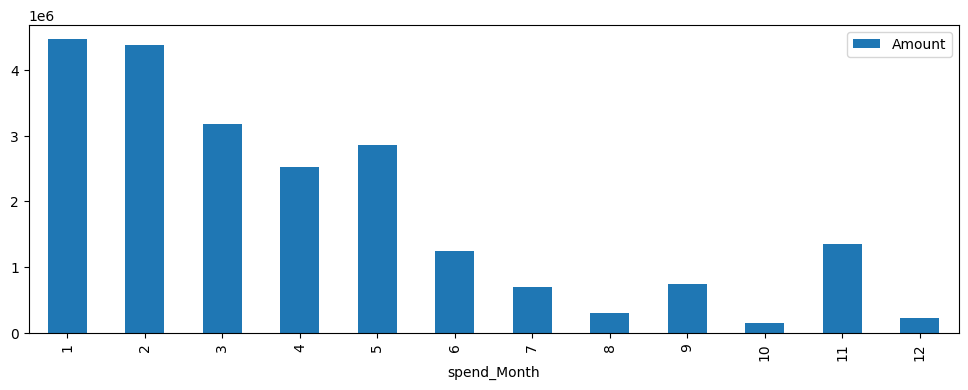

for city COCHIN, Monthly spends are:


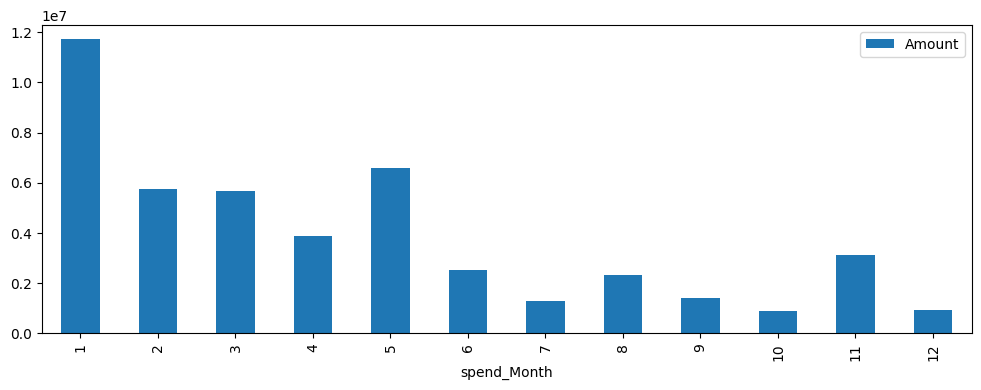

for city DELHI, Monthly spends are:


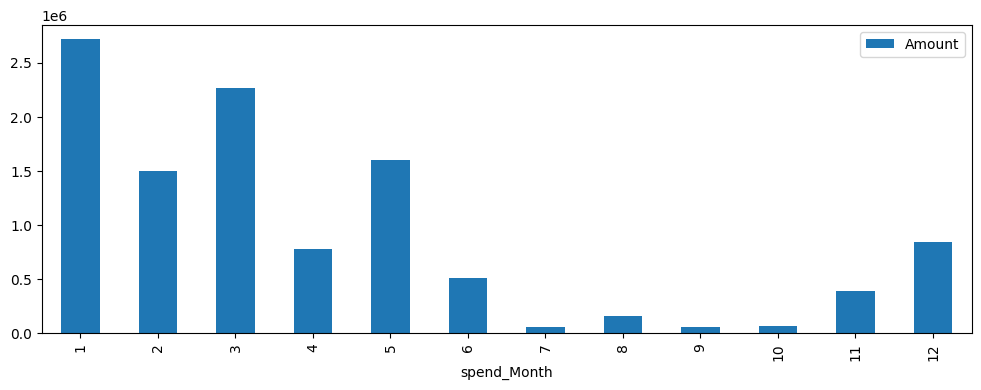

for city PATNA, Monthly spends are:


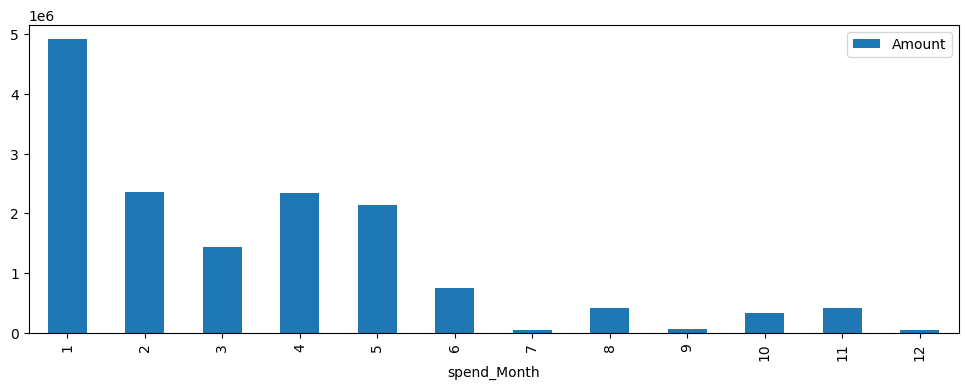

for city TRIVANDRUM, Monthly spends are:


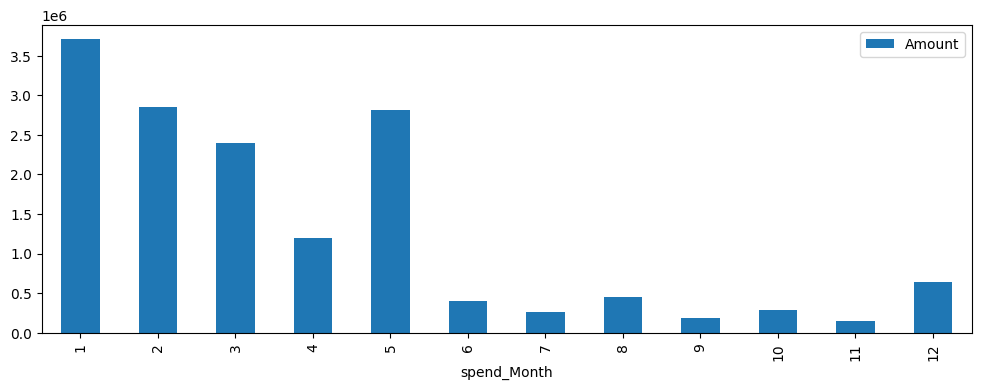

In [49]:
# Q.4(a) Create graphs for : Monthly comparison of total spends, city wise

df_city_spend = data_spend_CustAcqui.groupby(['City','spend_Month']).agg({'Amount':'sum'})
for city in list(df_city_spend.index.get_level_values(0).unique()):
    print(f"for city {city}, Monthly spends are:")
    for j in list(df_city_spend.index.get_level_values(1).unique()):
        plt.rcParams['figure.figsize'] = [12, 4]
        data_spend_CustAcqui[data_spend_CustAcqui['City']==city].groupby(['spend_Month']).agg({'Amount':'sum'}).plot(kind='bar')
        plt.show()
        break

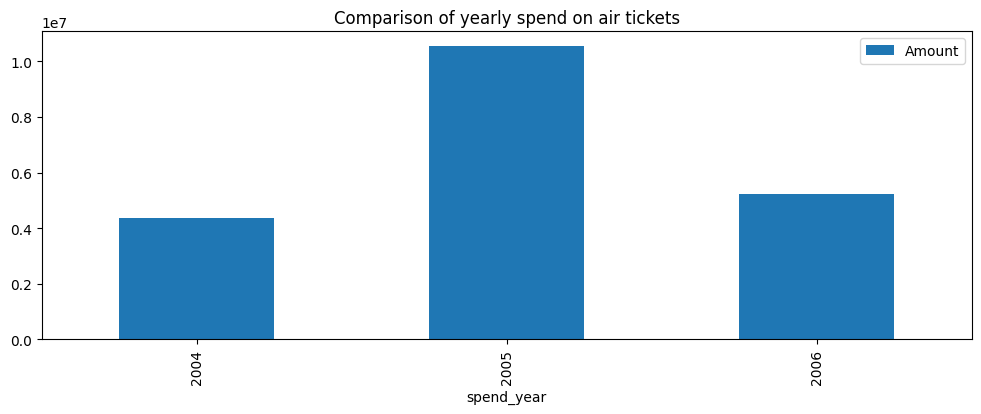

In [50]:
# Q.4(b) Create graphs for : Comparison of yearly spend on air tickets
data_spend_CustAcqui[data_spend_CustAcqui.Type=='AIR TICKET'].groupby(['spend_year']).agg({'Amount':'sum'}).plot(kind='bar')
plt.title('Comparison of yearly spend on air tickets')
plt.show()

for product type Gold, the monthly spend chart is :


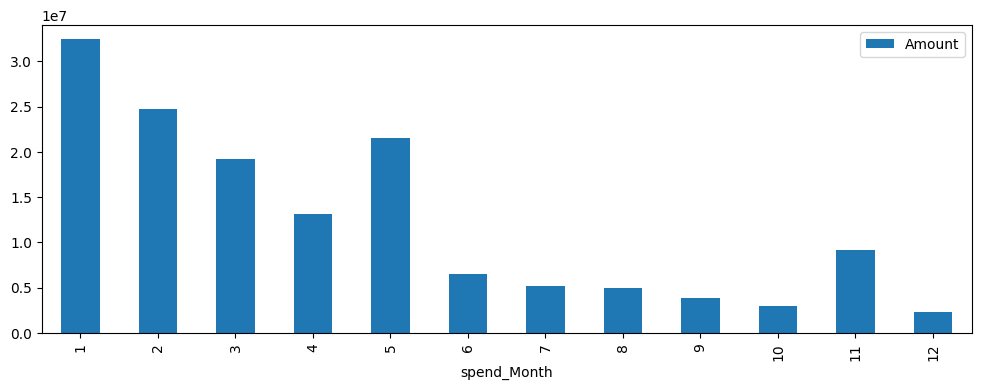

for product type Platinum, the monthly spend chart is :


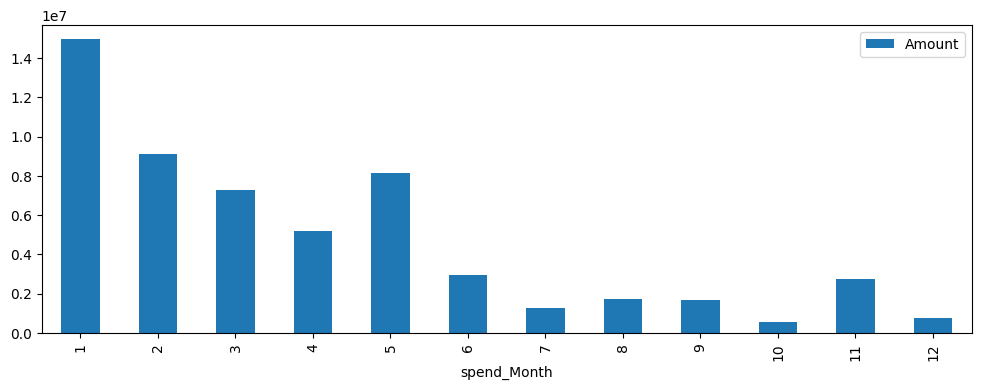

for product type Silver, the monthly spend chart is :


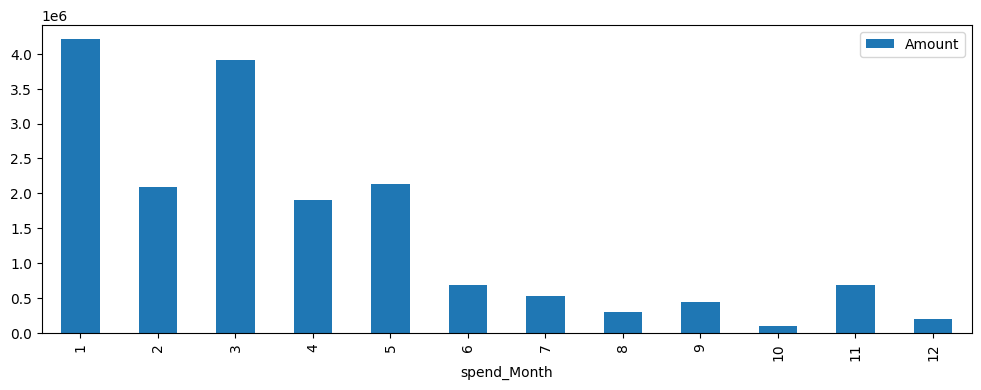

In [51]:
# Q.4(c) Create graphs for : Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
df_product_SpendMonth = data_spend_CustAcqui.groupby(['Product','spend_Month']).agg({'Amount':'sum'})
for product in list(df_product_SpendMonth.index.get_level_values(0).unique()):
    print(f"for product type {product}, the monthly spend chart is :")
    for j in list(df_product_SpendMonth.index.get_level_values(1).unique()):
        plt.rcParams['figure.figsize'] = [12, 4]
        data_spend_CustAcqui[data_spend_CustAcqui['Product']==product].groupby(['spend_Month']).agg({'Amount':'sum'}).plot(kind='bar')
        plt.show()
        break

In [52]:
# Q.5 Write user defined PYTHON function to perform the following analysis:
"""
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.
"""

# creating the year column 
data_repay_CustAcqui['repay_year'] = data_repay_CustAcqui['Month'].dt.year

# UDF
def top_10_customers_by_city_with_input():
    while True:
        my_product = input("enter the product name that you want from (Gold/Silver/Platinum): ").capitalize()
        time_period = input("enter the time period that you want (yearly or monthly): ")
    
        if my_product in ['Gold', 'Silver', 'Platinum'] and time_period in ['yearly','monthly']:
            break
        else:
            print("Wrong input(s) provided. Please try again.")
            choice = input("Do you want to try again? (yes/no): ").lower()
            if choice != 'yes':
                break

    if time_period == 'monthly':
        time_frame='repay_Month'
    else:
        time_frame='repay_year'
    my_df = data_repay_CustAcqui[data_repay_CustAcqui['Product']==my_product].groupby(['City',time_frame,'Customer']).agg({'Amount':'sum'}).reset_index()
    my_df['Amount'] = pd.to_numeric(my_df['Amount'] )
    for my_city in data_repay_CustAcqui.City.unique():
        print(f"top 10 customers where product is {my_product} & time period is {time_period} & city is {my_city} are: ")
        print(list(my_df[my_df['City']==my_city].sort_values(by='Amount', ascending=False).nlargest(10, columns='Amount').Customer))

In [53]:
top_10_customers_by_city_with_input()

top 10 customers where product is Gold & time period is yearly & city is BANGALORE are: 
['A43', 'A13', 'A13', 'A14', 'A14', 'A30', 'A43', 'A14', 'A30', 'A1']
top 10 customers where product is Gold & time period is yearly & city is PATNA are: 
['A26', 'A26', 'A26', 'A66', 'A95', 'A66']
top 10 customers where product is Gold & time period is yearly & city is CHENNAI are: 
['A27', 'A27', 'A27', 'A67', 'A67']
top 10 customers where product is Gold & time period is yearly & city is CALCUTTA are: 
['A60', 'A29', 'A60', 'A60', 'A15', 'A15', 'A29', 'A10', 'A31', 'A31']
top 10 customers where product is Gold & time period is yearly & city is COCHIN are: 
['A61', 'A45', 'A61', 'A45', 'A61', 'A11', 'A11', 'A16', 'A45', 'A32']
top 10 customers where product is Gold & time period is yearly & city is BOMBAY are: 
['A17', 'A42', 'A12', 'A42', 'A12', 'A12', 'A62', 'A62', 'A62', 'A42']
top 10 customers where product is Gold & time period is yearly & city is DELHI are: 
['A44', 'A44', 'A44', 'A93', 'A8